## Importing Libraries

In [70]:
# Importing the usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style to no-grid
sns.set_style("whitegrid", {'axes.grid' : False})

# Importing Sklean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing knee locator and counter
from kneed import KneeLocator
from collections import Counter

---

## Reading File

In [32]:
# Reading main color csv
color_df = pd.read_csv('color-names/output/colors.csv', header = None)
color_df.columns = ['name','name_2','hex','R','G','B']
color_rgb = color_df[['R','G','B']]

---

## KMeans looping to identify optimum k using elbow method

In [10]:
# KMeans to cluster up colors
k_list = []
sil_list = []
inertia_list = []

for num in range(2,200,2):
    clf = KMeans(n_clusters = num)
    label = clf.fit_predict(color_rgb)
    k_list.append(num)
    sil_list.append(silhouette_score(color_rgb,label))
    inertia_list.append(clf.inertia_)
    
# Compiling results into DataFrame    
results = pd.DataFrame({'k':k_list,'sil_score':sil_list,'inertia':inertia_list})

In [40]:
# Knee locator based on inertia
kn = KneeLocator(results['k'], results['inertia'],
                 curve='convex',
                 direction='decreasing')

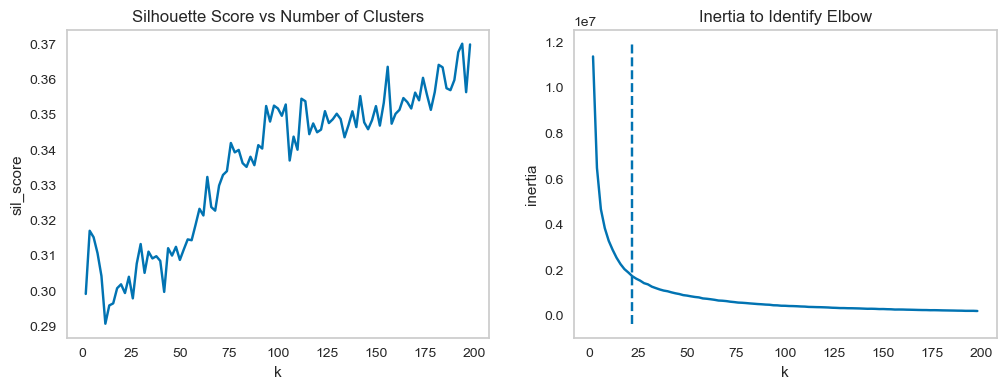

In [68]:
# Plotting silhouette score and inertia
fig, axs = plt.subplots(1,2,figsize=(12,4))

axs[0].set_title('Silhouette Score vs Number of Clusters')
sns.lineplot(x = 'k',y = 'sil_score', data=results, ax=axs[0])

axs[1].set_title('Inertia to Identify Elbow')
sns.lineplot(x='k',y='inertia', data=results, ax=axs[1])
axs[1].vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed');

**Interpretation:**
- silhouette score is not a good indicator
- inertia can be used to identify elbow at k = 22
- we will add black and white to the color clusters as they are important colors
- we will generate 3 files based on this elbow (12 colors, 24 colors, and 36 colors)

---

## Generating main color csv based on elbow

In [54]:
def create_color_cluster(num_color):
    # Clustering to identify color center

    # From elbow method, with elbow from kn.knee
    clf = KMeans(n_clusters = num_color)
    label = clf.fit_predict(color_rgb)

    # Generate color centers
    center_colors = clf.cluster_centers_
    counts = Counter(label)
    
    # Get RGB of main colors
    rgb_colors = [center_colors[i] for i in counts.keys()]

    # Divide by 255 to use as color plot below
    rgba_colors = [center_colors[i]/255 for i in counts.keys()]

    # Forming dataframe to main image colors to the main
    # main color 
    main_color_df = pd.DataFrame(rgb_colors,columns=['R','G','B'])

    # white
    white = pd.DataFrame({'R':255, 'G':255, 'B':255,
                          'main_cluster':main_color_df.shape[0]},index=[0])

    # black
    black = pd.DataFrame({'R':0, 'G':0, 'B':0,
                          'main_cluster':main_color_df.shape[0]},index=[0])

    # combine main_color + white + black -> add main_cluster column
    main_color_df = pd.concat([main_color_df,white,black],ignore_index=True)

    # Showing the main colors from clustering
    plt.figure(figsize=(6,6))
    plt.pie(counts.values(),colors = rgba_colors)
    plt.show()
    
    return main_color_df

### 24 Colors

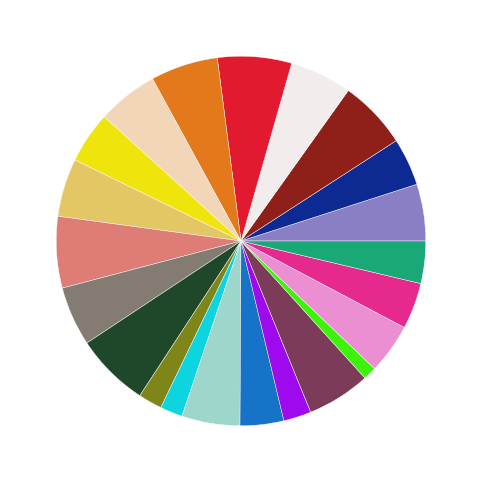

In [69]:
main_color_24 = create_color_cluster(kn.knee)

In [76]:
# save 24 main colors to a csv
main_color_24.to_csv('main_color_24.csv')

### 12 Colors

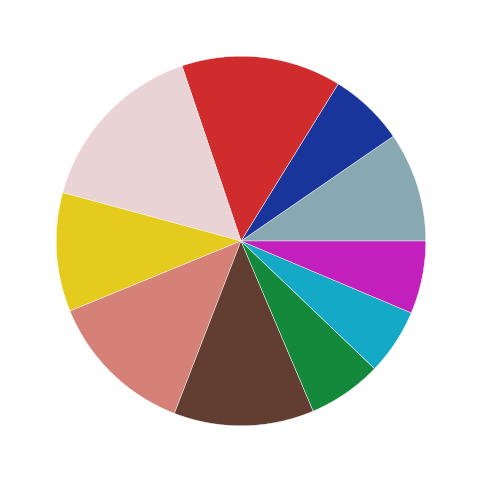

In [78]:
main_color_12 = create_color_cluster(10)

In [79]:
# save 12 main colors to a csv
main_color_12.to_csv('main_color_12.csv')

### 36 Colors

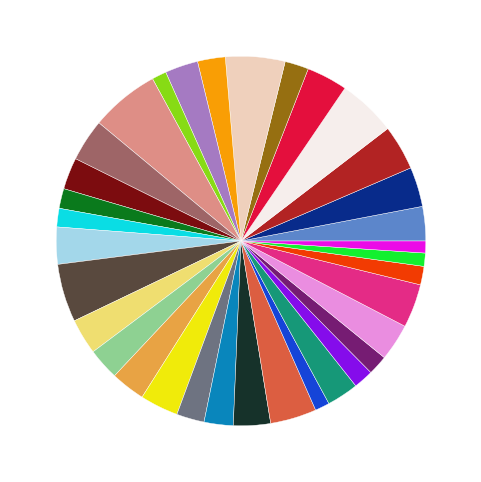

In [80]:
main_color_36 = create_color_cluster(34)

In [81]:
# save 36 main colors to a csv
main_color_36.to_csv('main_color_36.csv')

---